In [ ]:
from Preprocessing import *
merged_hornsea = pd.read_parquet("Data/preprocessed_hornsea_with_energy.parquet")
merged_pes = pd.read_parquet("Data/preprocessed_pes_with_energy.parquet")
merged_demand = pd.read_parquet("Data/preprocessed_demand_with_energy.parquet")

## .nc Dateien ##

In [ ]:
import xarray
import os
import pandas as pd
from Preprocessing import *

extractor = FileExtractor()

df_dwd_hornsea_unprocessed = extractor.combine_files("Data/nc_files", "dwd_icon_eu_hornsea")
df_dwd_pes_unprocessed = extractor.combine_files("Data/nc_files", "dwd_icon_eu_pes10")
df_dwd_demand_unprocessed = extractor.combine_files("Data/nc_files", "dwd_icon_eu_demand")

ncep_gfs_hornsea_unprocessed = extractor.combine_files("Data/nc_files", "ncep_gfs_hornsea")
ncep_gfs_pes_unprocessed = extractor.combine_files("Data/nc_files", "ncep_gfs_pes10")
ncep_gfs_demand_unprocessed = extractor.combine_files("Data/nc_files", "ncep_gfs_demand")

In [41]:
ncep_gfs_pes_unprocessed["ref_time"] = pd.to_datetime(ncep_gfs_pes_unprocessed.reset_index()["level_0"])

In [48]:
ncep_gfs_pes_unprocessed = ncep_gfs_pes_unprocessed.reset_index()

In [55]:
ncep_gfs_pes_unprocessed[ncep_gfs_pes_unprocessed.SolarDownwardRadiation > 1000]

,level_0,level_1,point,CloudCover,SolarDownwardRadiation,Temperature,latitude,longitude,ref_time
12005013,2022-09-08 12:00:00,2,13,0.221,1027.940002,19.972229,52.768128,0.169926,NaT
12005017,2022-09-08 12:00:00,2,17,0.101,1096.180023,20.072235,52.521486,1.570682,NaT
12005384,2022-09-08 12:00:00,21,4,0.539,1288.839951,16.389069,51.956370,0.658817,NaT
12005439,2022-09-08 12:00:00,23,19,0.394,1057.180176,18.808167,52.078072,-0.011349,NaT
12005871,2022-09-08 12:00:00,45,11,0.346,1111.219940,17.508484,52.067943,1.175175,NaT
...,...,...,...,...,...,...,...,...,...
12011644,2022-09-08 18:00:00,135,4,1.000,1068.959976,14.850006,51.956370,0.658817,NaT
12011648,2022-09-08 18:00:00,135,8,0.958,1081.699966,15.750000,52.196077,0.153446,NaT
12011652,2022-09-08 18:00:00,135,12,0.992,1176.719982,14.250000,52.024023,0.296268,NaT
12011658,2022-09-08 18:00:00,135,18,0.116,1025.020050,15.950012,52.877668,1.191654,NaT


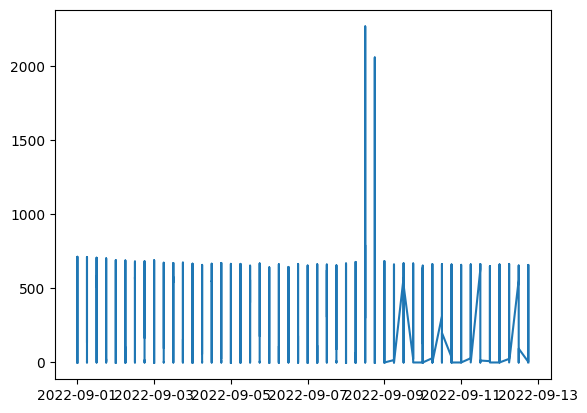

In [56]:
import matplotlib.pyplot as plt


g = ncep_gfs_pes_unprocessed[(ncep_gfs_pes_unprocessed.level_0.dt.year == 2022) & (ncep_gfs_pes_unprocessed.level_0.dt.month == 9)].iloc[:200000]
plt.plot(g["level_0"], g["SolarDownwardRadiation"])

Visualisierung auf der Karte

<Axes: >

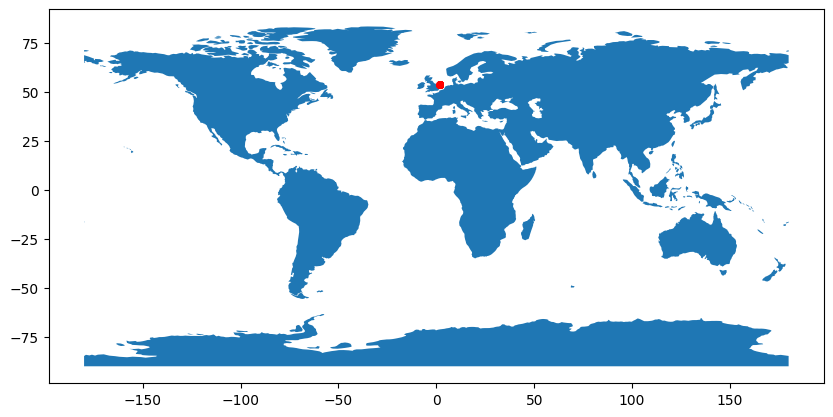

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df1_ = pd.concat([df_dwd_hornsea_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_hornsea_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df1_['longitude'], df1_['latitude'])]
gdf = GeoDataFrame(df1_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<Axes: >

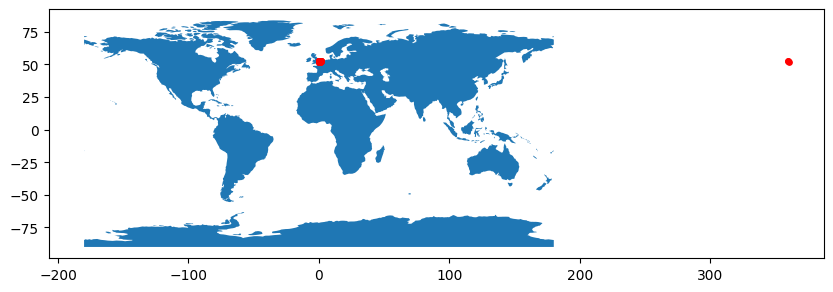

In [38]:
df2_ = pd.concat([df_dwd_pes_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_pes_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df2_['longitude'], df2_['latitude'])]
gdf = GeoDataFrame(df2_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

<Axes: >

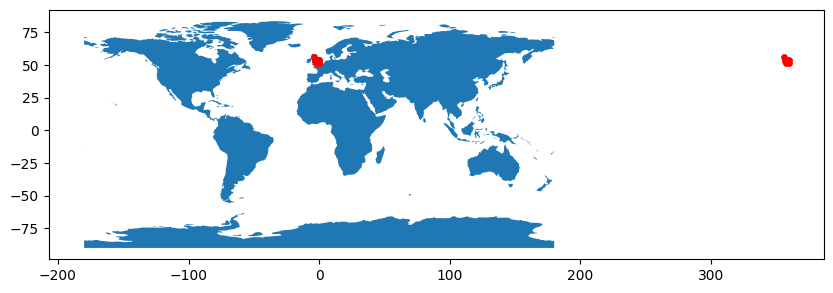

In [39]:
df3_ = pd.concat([df_dwd_demand_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates(), ncep_gfs_demand_unprocessed.reset_index()[["latitude", "longitude"]].drop_duplicates()])

geometry = [Point(xy) for xy in zip(df3_['longitude'], df3_['latitude'])]
gdf = GeoDataFrame(df3_, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [40]:
import numpy as np
import dask.dataframe as dd
import math

preprocesser = Preprocessing()

df_dwd_hornsea = preprocesser.preprocess_geo_data(df_dwd_hornsea_unprocessed)
ncep_gfs_hornsea = preprocesser.preprocess_geo_data(ncep_gfs_hornsea_unprocessed)
df_dwd_pes = preprocesser.preprocess_geo_data(df_dwd_pes_unprocessed)
ncep_gfs_pes = preprocesser.preprocess_geo_data(ncep_gfs_pes_unprocessed)
df_dwd_demand = preprocesser.preprocess_geo_data(df_dwd_demand_unprocessed)
ncep_gfs_demand = preprocesser.preprocess_geo_data(ncep_gfs_demand_unprocessed)

In [41]:
hornsea = preprocesser.merge_weather_stations_data(df_dwd_hornsea, ncep_gfs_hornsea)
demand = preprocesser.merge_weather_stations_data(df_dwd_demand, ncep_gfs_demand)
pes = preprocesser.merge_weather_stations_data(df_dwd_pes, ncep_gfs_pes)

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:651: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:651: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:651: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [42]:
hornsea = preprocesser.add_difference_features(hornsea)
pes = preprocesser.add_difference_features(pes)
demand = preprocesser.add_difference_features(demand)

## .JSON Dateien ##

In den JSON-Dateien befinden sich Informationen zu (un-)geplanten Ausfällen auf der Windkraftanlage HORNSEA.

In [ ]:
import json
from Preprocessing import *

extractor = FileExtractor()

json_data = extractor.extract_json_files("Data/nc_files/REMIT")

In [44]:
json_data.head()

,id,dataset,mrid,revisionNumber,publishTime,createdTime,messageType,messageHeading,eventType,unavailabilityType,...,fuelType,normalCapacity,availableCapacity,unavailableCapacity,eventStatus,eventStartTime,eventEndTime,cause,relatedInformation,outageProfile
0,190586,REMIT,11XDONG-PT-----2-NGET-RMT-00001016,2,2020-11-24T15:55:00Z,2020-11-24T15:55:00Z,UnavailabilitiesOfElectricityFacilities,REMIT Information,Production unavailability,Planned,...,Wind Offshore,400,0,400,Active,2020-11-24T08:00:00Z,2020-11-24T18:30:00Z,Planned Outage,HOW01 BMU 3 will be undergoing frequency respo...,"[{'startTime': '2020-11-24T08:00:00Z', 'endTim..."
1,192103,REMIT,11XDONG-PT-----2-NGET-RMT-00001016,1,2020-11-24T12:00:00Z,2020-11-24T12:00:00Z,UnavailabilitiesOfElectricityFacilities,REMIT Information,Production unavailability,Planned,...,Wind Offshore,400,0,400,Active,2020-11-24T08:00:00Z,2020-11-24T17:00:00Z,Planned Outage,HOW01 BMU 3 will be undergoing frequency respo...,"[{'startTime': '2020-11-24T08:00:00Z', 'endTim..."
2,196403,REMIT,11XDONG-PT-----2-NGET-RMT-00001000,2,2020-10-31T00:38:00Z,2020-10-31T00:38:00Z,UnavailabilitiesOfElectricityFacilities,REMIT Information,Production unavailability,Unplanned,...,Wind Offshore,400,0,400,Active,2020-10-31T00:00:00Z,2020-10-31T02:00:00Z,Under Investigation,This is an outage of turbines after the earlie...,"[{'startTime': '2020-10-31T00:00:00Z', 'endTim..."
3,196590,REMIT,11XDONG-PT-----2-NGET-RMT-00000994,2,2020-10-30T13:41:00Z,2020-10-30T13:41:00Z,UnavailabilitiesOfElectricityFacilities,REMIT Information,Production unavailability,Unplanned,...,Wind Offshore,400,0,400,Active,2020-10-30T11:00:00Z,2020-10-30T18:00:00Z,Under Investigation,Actual start time of event is 30/10/2020 11:11...,"[{'startTime': '2020-10-30T11:00:00Z', 'endTim..."
4,196933,REMIT,11XDONG-PT-----2-NGET-RMT-00001000,1,2020-10-31T00:26:00Z,2020-10-31T00:26:00Z,UnavailabilitiesOfElectricityFacilities,REMIT Information,Production unavailability,Unplanned,...,Wind Offshore,400,0,400,Active,2020-10-31T00:00:00Z,2020-10-31T01:00:00Z,Under Investigation,This is an outage of turbines after the earlie...,"[{'startTime': '2020-10-31T00:00:00Z', 'endTim..."


In [45]:
# df_outage = pd.DataFrame()

# for id, x in json_data[["id", "outageProfile"]].iterrows():
#     now_id = x["id"]
#     for y in x["outageProfile"]:
#         y["id"] = now_id
#         df_outage = pd.concat([df_outage, pd.json_normalize(y)])

# df_outage

Die JSON-Datei enthält Informationen zu geplanten oder unerwarteten Ausfällen in der Windkraftanlage HORNSEA. Jede Zeile beschreibt einen Vorfall und dessen Beginn und Abschluss. 

Daher wird jede Zeile genutzt, um aus der Dauer zwischen Anfang und Beginn eines Ausfalls ein Zeitintervallindex zu erstellen mit einem Intervall von 30 Minuten. Anschließend wird dieser neue Datensatz mit den HORNSEA-Daten zusammengefügt.

In [9]:
from Preprocessing import *
preprocesser = Preprocessing()
outages_df = preprocesser.preprocess_outage_data(json_data)

c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:326: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  outages_df = pd.concat([outages_df, json_data_with_date_ranges])
c:\Users\danie\Documents\AWP2_Repo\awp2\Preprocessing.py:326: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outages_df = pd.concat([outages_df, json_data_with_date_ranges])


## .csv Dateien ##

In [1]:
import pandas as pd
import os
from Preprocessing import *
preprocesser = Preprocessing()
extractor = FileExtractor()

In [ ]:
df_energy = extractor.combine_files("Data/csv_files", "Energy_data", ".csv")

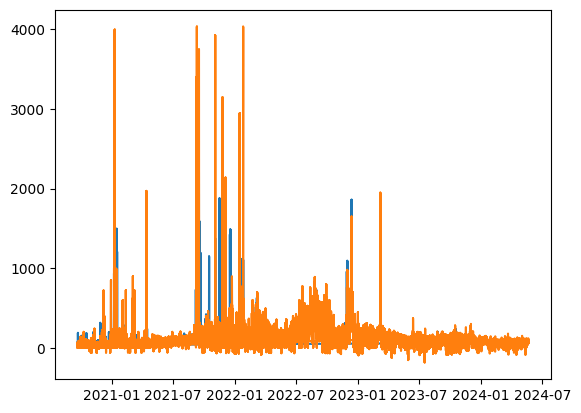

In [8]:
import matplotlib.pyplot as plt
df_energy["dtm"] = pd.to_datetime(df_energy["dtm"])
plt.plot(df_energy["dtm"], df_energy["DA_Price"])
plt.plot(df_energy["dtm"], df_energy["SS_Price"])

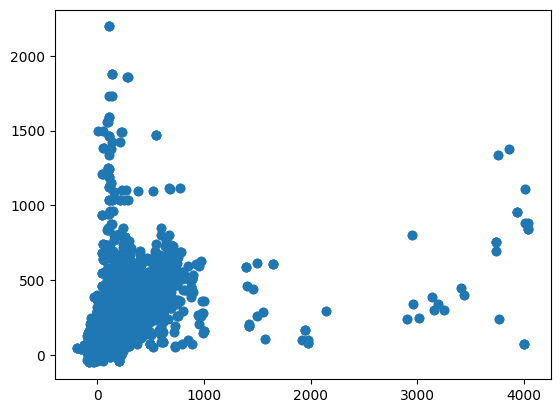

In [17]:
plt.scatter(df_energy["SS_Price"], df_energy["DA_Price"])

In [13]:
df_energy[["DA_Price", "SS_Price", "Solar_MW", "Wind_MW"]].corr()

,DA_Price,SS_Price,Solar_MW,Wind_MW
DA_Price,1.000000,0.615965,-0.021483,-0.134542
SS_Price,0.615965,1.000000,-0.041038,-0.104322
Solar_MW,-0.021483,-0.041038,1.000000,-0.137611
Wind_MW,-0.134542,-0.104322,-0.137611,1.000000


## Feature Engineering ##

In [53]:
merged_hornsea.columns

Index(['Solar_MWh_credit', 'Wind_MWh_credit', 'affectedUnit',
       'availableCapacity', 'cos_day', 'cos_dayofweek', 'cos_hour',
       'cos_month', 'forecast_horizon', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outage', 'rel_hum', 'rel_hum_diff', 'sin_day',
       'sin_dayofweek', 'sin_hour', 'sin_month', 'temp', 'temp_diff',
       'temp_max_3h', 'temp_max_6h', 'temp_mean_3h', 'temp_mean_6h',
       'temp_min_3h', 'temp_min_6h', 'temp_next_forecast', 'temp_range_3h',
       'temp_std_3h', 'temp_std_6h', 'unavailabilityType',
       'unavailableCapacity', 'wind_dir_100_cos', 'wind_dir_100_sin',
       'wind_dir_cos', 'wind_dir_sin', 'wind_speed', 'wind_speed_100',
       'wind_speed_100_diff', 'wind_speed_100_max_3h', 'wind_speed_100_max_6h',
       'wind_speed_100_mean_3h', 'wind_speed_100_mean_6h',
       'wind_speed_100_min_3h', 'wind_speed_100_min_6h',
       'wind_speed_100_next_forecast', 'wind_speed_100_range_3h',
       'wind_speed_100_std_3h', 'wind_speed_100_std_6h'

In [54]:
merged_pes.columns

Index(['Solar_MWh_credit', 'Wind_MWh_credit', 'capacity_mwp', 'cloud_cover',
       'cloud_cover_diff', 'cloud_cover_max_3h', 'cloud_cover_max_6h',
       'cloud_cover_mean_3h', 'cloud_cover_mean_6h', 'cloud_cover_min_3h',
       'cloud_cover_min_6h', 'cloud_cover_next_forecast', 'cloud_cover_std_3h',
       'cloud_cover_std_6h', 'cos_day', 'cos_dayofweek', 'cos_hour',
       'cos_month', 'forecast_horizon', 'installed_capacity_mwp',
       'interaction_solar_down_rad_temp', 'sin_day', 'sin_dayofweek',
       'sin_hour', 'sin_month', 'solar_down_rad', 'solar_down_rad_diff',
       'solar_down_rad_max_3h', 'solar_down_rad_max_6h',
       'solar_down_rad_mean_3h', 'solar_down_rad_mean_6h',
       'solar_down_rad_min_3h', 'solar_down_rad_min_6h',
       'solar_down_rad_next_forecast', 'solar_down_rad_range_3h',
       'solar_down_rad_std_3h', 'solar_down_rad_std_6h', 'temp', 'temp_diff',
       'temp_max_3h', 'temp_max_6h', 'temp_mean_3h', 'temp_mean_6h',
       'temp_min_3h', 'temp_min_6

In [55]:
from sklearn.preprocessing import OneHotEncoder

# columns_to_ohe = ["unavailabilityType", "affectedUnit"]

# ohe_hornsea = OneHotEncoder(sparse_output = False)
# ohe_hornsea.fit_transform(merged_hornsea[columns_to_ohe])
# ohe_hornsea.get_feature_names_out()

In [56]:
merged_hornsea.columns

Index(['Solar_MWh_credit', 'Wind_MWh_credit', 'affectedUnit',
       'availableCapacity', 'cos_day', 'cos_dayofweek', 'cos_hour',
       'cos_month', 'forecast_horizon', 'hoursSinceOutage',
       'hoursUntilOutageEnd', 'outage', 'rel_hum', 'rel_hum_diff', 'sin_day',
       'sin_dayofweek', 'sin_hour', 'sin_month', 'temp', 'temp_diff',
       'temp_max_3h', 'temp_max_6h', 'temp_mean_3h', 'temp_mean_6h',
       'temp_min_3h', 'temp_min_6h', 'temp_next_forecast', 'temp_range_3h',
       'temp_std_3h', 'temp_std_6h', 'unavailabilityType',
       'unavailableCapacity', 'wind_dir_100_cos', 'wind_dir_100_sin',
       'wind_dir_cos', 'wind_dir_sin', 'wind_speed', 'wind_speed_100',
       'wind_speed_100_diff', 'wind_speed_100_max_3h', 'wind_speed_100_max_6h',
       'wind_speed_100_mean_3h', 'wind_speed_100_mean_6h',
       'wind_speed_100_min_3h', 'wind_speed_100_min_6h',
       'wind_speed_100_next_forecast', 'wind_speed_100_range_3h',
       'wind_speed_100_std_3h', 'wind_speed_100_std_6h'

In [57]:
feature_engineerer = FeatureEngineerer(merged_pes)

In [58]:
from statsmodels.tsa.stattools import adfuller

adfuller(merged_pes["temp"].values)

(-8.060830037191526,
 1.6447716572864828e-12,
 61,
 64162,
 {'1%': -3.430451922658868,
  '5%': -2.8615850479411327,
  '10%': -2.5667939774910353},
 -170834.15873385558)

In [59]:
adfuller(merged_pes["solar_down_rad"].values)

(-10.677727354680615,
 4.013510779857156e-19,
 61,
 64162,
 {'1%': -3.430451922658868,
  '5%': -2.8615850479411327,
  '10%': -2.5667939774910353},
 399049.48630861077)

In [60]:
adfuller(merged_hornsea["temp"].values)

(-4.399832279029081,
 0.00029703556148408716,
 61,
 64162,
 {'1%': -3.430451922658868,
  '5%': -2.8615850479411327,
  '10%': -2.5667939774910353},
 -275495.5192316227)

In [61]:
adfuller(merged_hornsea["temp_diff"].values)

(-36.61341645625929,
 0.0,
 61,
 64162,
 {'1%': -3.430451922658868,
  '5%': -2.8615850479411327,
  '10%': -2.5667939774910353},
 -275503.06441159564)

<Axes: >

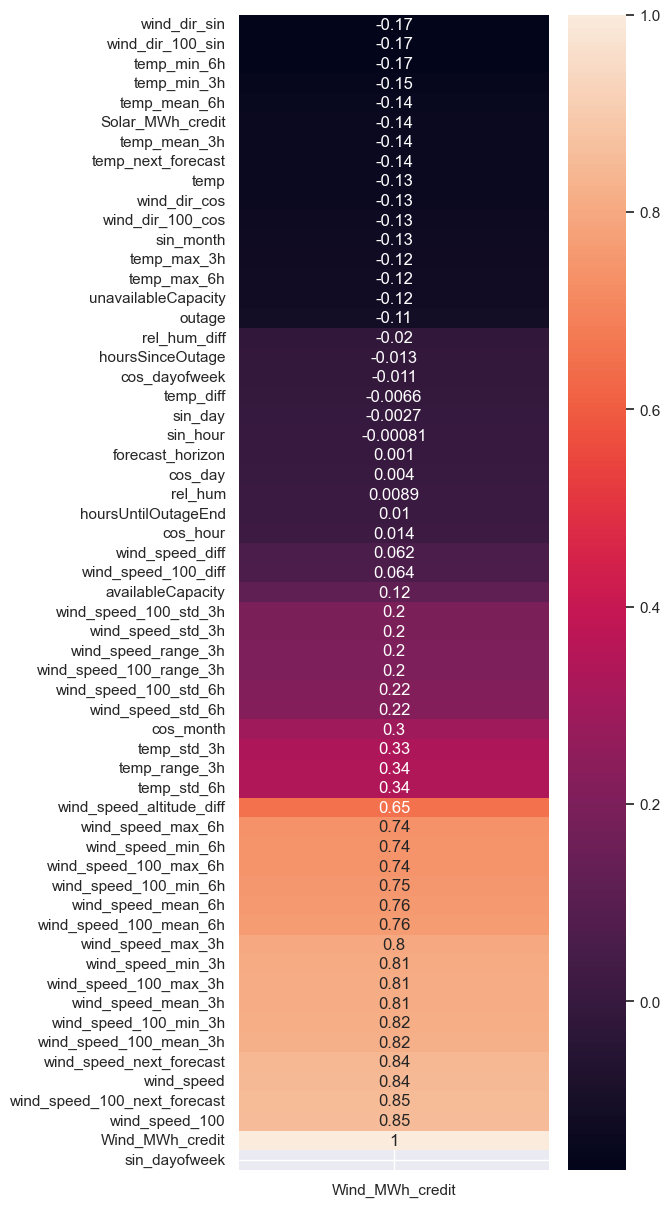

In [75]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(5,15)})
sns.heatmap(merged_hornsea.drop(["affectedUnit", "unavailabilityType"], axis = 1).corr()[["Wind_MWh_credit"]].sort_values(by = "Wind_MWh_credit"), annot = True)

<Axes: >

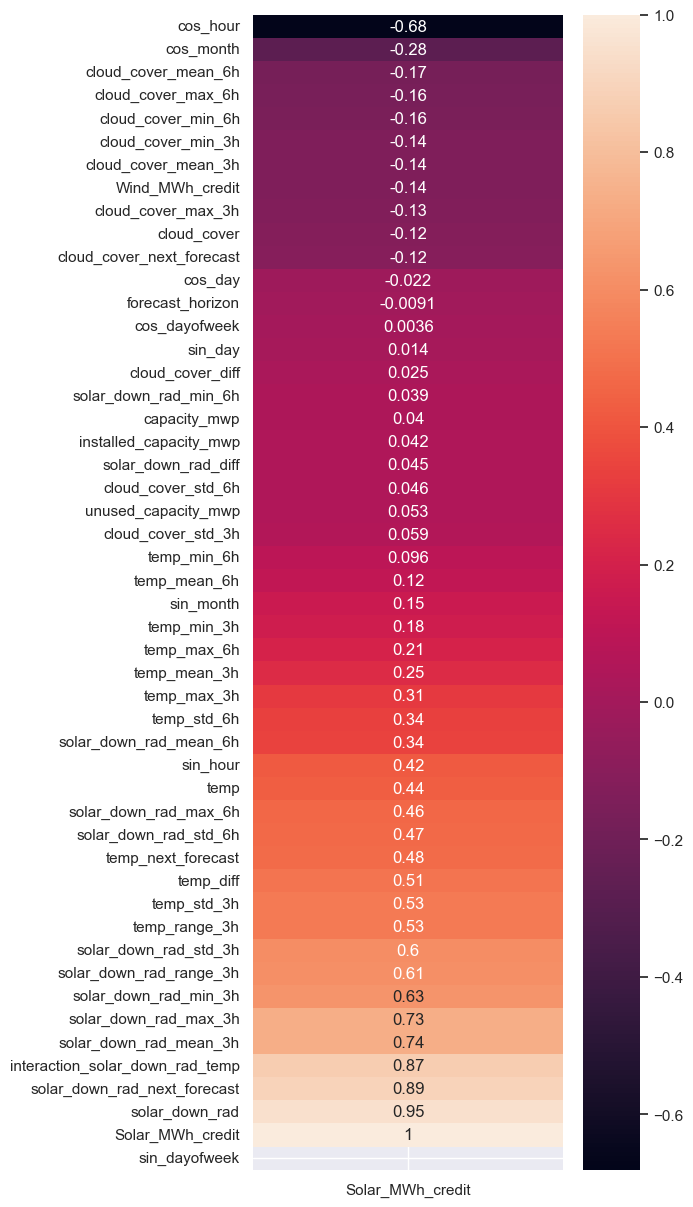

In [64]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(5,15)})
sns.heatmap(merged_pes.corr()[["Solar_MWh_credit"]].sort_values(by = "Solar_MWh_credit"), annot = True)